In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import  matplotlib.pyplot as plt

plt.style.use('classic')




In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(df.shape, df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
(891, 12) None


In [4]:
print(df['Sex'].value_counts())
print(df['Pclass'].value_counts())
print(df['Embarked'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [5]:
# Survival by Sex
print(df.groupby('Sex')['Survived'].mean())

# Survival by Pclass
print(df.groupby('Pclass')['Survived'].mean())

# Survival by Embarked
print(df.groupby('Embarked')['Survived'].mean())


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


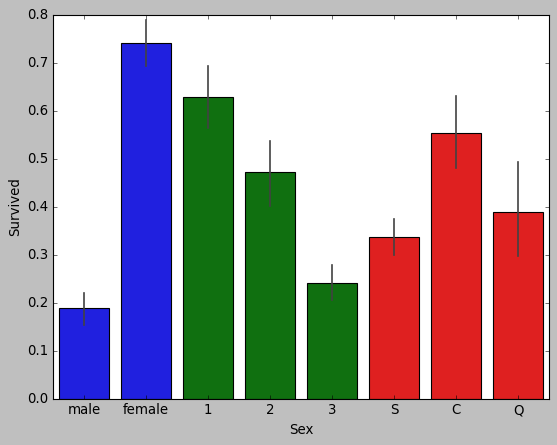

In [6]:
# Sex vs Survival
sns.barplot(x='Sex', y='Survived', data=df)

# Pclass vs Survival
sns.barplot(x='Pclass', y='Survived', data=df)

# Embarked vs Survival
sns.barplot(x='Embarked', y='Survived', data=df)
plt.show()


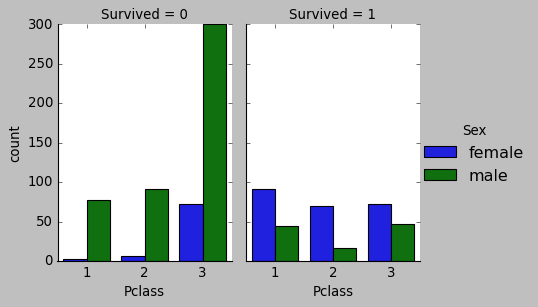

In [8]:
sns.catplot(x='Pclass', hue='Sex', col='Survived',
            data=df, kind='count', height=4, aspect=.7)

In [9]:
# Check for missing values
print(df.isnull().sum().sort_values(ascending=False))

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64


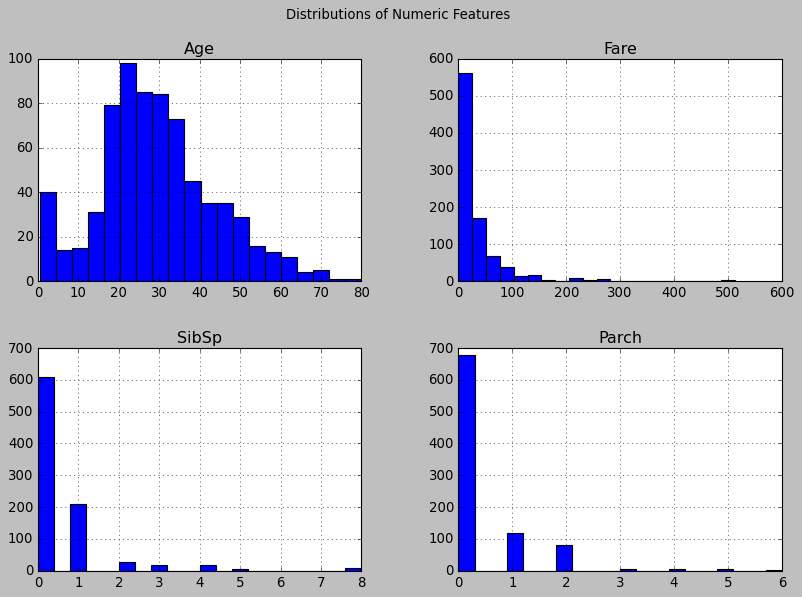

In [10]:
num_features = ["Age", "Fare", "SibSp", "Parch"]

# Histograms
df[num_features].hist(bins=20, figsize=(12, 8), edgecolor='black')
plt.suptitle("Distributions of Numeric Features")
plt.show()

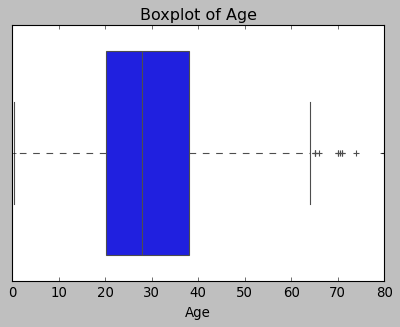

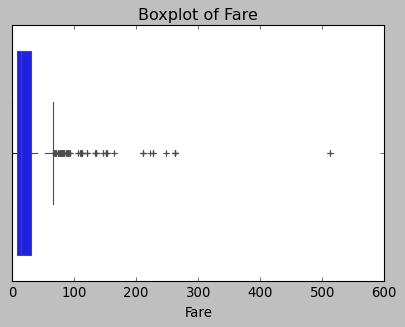

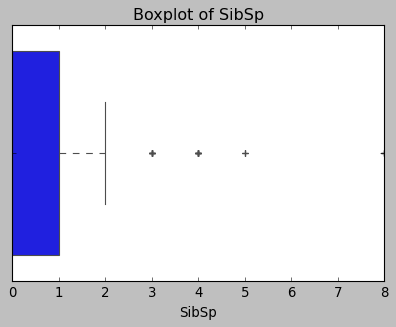

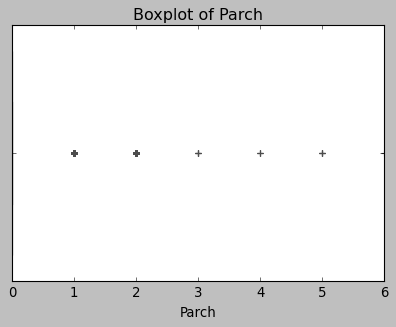

In [11]:
for col in num_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

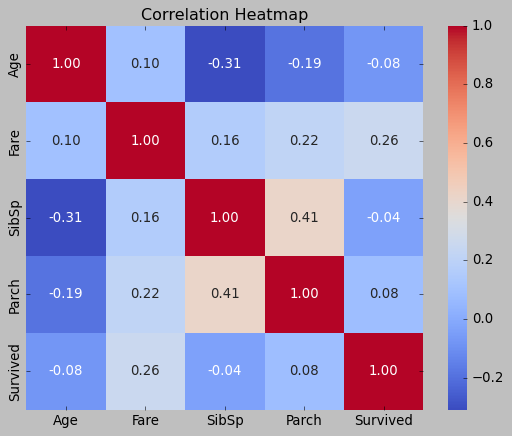

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_features + ['Survived']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [13]:
# Fill missing Embarked with the most common value
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [14]:
# Fill missing Age with median (more robust than mean)
df['Age'] = df['Age'].fillna(df['Age'].median())

In [ ]:
# Option 1: Drop Cabin (too many missing values)
df = df.drop(columns=['Cabin'])

In [16]:
df = df.drop(columns=['Ticket'])

In [17]:
# One-hot encode categorical columns
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [18]:
print(df.isnull().sum().sort_values(ascending=False))

PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64


In [19]:
# Family size = SibSp + Parch + 1 (the passenger themselves)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [20]:
# Passenger traveling alone
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

In [21]:
# Extract title from Name (Mr, Mrs, Miss, etc.)
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Simplify rare titles
df['Title'] = df['Title'].replace(
    ['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],
    'Rare'
)
df['Title'] = df['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'})

# One-hot encode Title
df = pd.get_dummies(df, columns=['Title'], drop_first=True)

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_2143683/1844010283.py:2: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [22]:
# Drop Name (we've extracted Title already)
df = df.drop(columns=['Name'])

In [23]:
print(df.head())
print(df.shape)

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  \
0            1         0       3  22.0      1      0   7.2500      True   
1            2         1       1  38.0      1      0  71.2833     False   
2            3         1       3  26.0      0      0   7.9250     False   
3            4         1       1  35.0      1      0  53.1000     False   
4            5         0       3  35.0      0      0   8.0500      True   

   Embarked_Q  Embarked_S  FamilySize  IsAlone  Title_Miss  Title_Mr  \
0       False        True           2        0       False      True   
1       False       False           2        0       False     False   
2       False        True           1        1        True     False   
3       False        True           2        0       False     False   
4       False        True           1        1       False      True   

   Title_Mrs  Title_Rare  
0      False       False  
1       True       False  
2      False       False  
3       

In [24]:
from sklearn.model_selection import train_test_split

# Target
y = df['Survived']

# Features (drop Survived itself)
X = df.drop(columns=['Survived'])

# Split data (80/20 split, stratified to preserve survival ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (712, 15)
Test shape: (179, 15)


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Identify numeric vs categorical
num_features = ["Age", "Fare", "SibSp", "Parch", "FamilySize"]
cat_features = [col for col in X.columns if col not in num_features]

# Preprocessor: scale numerics, pass categoricals
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", "passthrough", cat_features)
    ]
)

# Logistic Regression pipeline
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

clf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch', 'FamilySize']),
                                                 ('cat', 'passthrough',
                                                  ['PassengerId', 'Pclass',
                                                   'Sex_male', 'Embarked_Q',
                                                   'Embarked_S', 'IsAlone',
                                                   'Title_Miss', 'Title_Mr',
                                                   'Title_Mrs',
                                                   'Title_Rare'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

Accuracy: 0.8324022346368715

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       110
           1       0.82      0.72      0.77        69

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



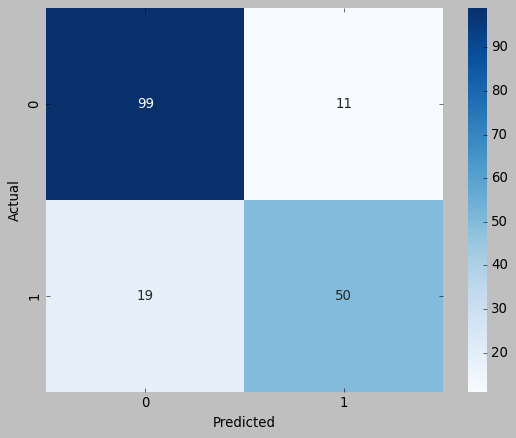

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
y_pred = clf.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [27]:
# PyTorch + utils
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# Sklearn for split/metrics/scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
import numpy as np
import random

# Reproducibility
SEED = 42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED); torch.cuda.manual_seed_all(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DEVICE

device(type='cuda')

In [28]:
# Target and features (df is your cleaned & engineered dataframe)
y = df['Survived'].astype(np.float32).values
X = df.drop(columns=['Survived'])

# Identify numeric columns you want scaled (adjust if you added/removed cols)
num_cols = [c for c in ['Age','Fare','SibSp','Parch','FamilySize'] if c in X.columns]
cat_cols = [c for c in X.columns if c not in num_cols]  # already one-hot encoded

# Split train/test first, then carve out a val set from train
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=SEED
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=SEED
)

# Scale numeric features (fit on train only, transform val/test)
scaler = StandardScaler()
if len(num_cols) > 0:
    X_train_scaled = X_train.copy()
    X_val_scaled   = X_val.copy()
    X_test_scaled  = X_test.copy()
    X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
    X_val_scaled[num_cols]   = scaler.transform(X_val[num_cols])
    X_test_scaled[num_cols]  = scaler.transform(X_test[num_cols])
else:
    X_train_scaled, X_val_scaled, X_test_scaled = X_train, X_val, X_test

# To numpy float32 for PyTorch
X_train_np = X_train_scaled.values.astype(np.float32)
X_val_np   = X_val_scaled.values.astype(np.float32)
X_test_np  = X_test_scaled.values.astype(np.float32)

X_train_np.shape, X_val_np.shape, X_test_np.shape

((569, 15), (143, 15), (179, 15))

In [29]:
class TabularDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y).view(-1, 1)  # (N,1) for BCEWithLogitsLoss

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_ds = TabularDataset(X_train_np, y_train)
val_ds   = TabularDataset(X_val_np, y_val)
test_ds  = TabularDataset(X_test_np, y_test)

BATCH_SIZE = 64
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, drop_last=False)
val_dl   = DataLoader(val_ds,   batch_size=BATCH_SIZE, shuffle=False, drop_last=False)
test_dl  = DataLoader(test_ds,  batch_size=BATCH_SIZE, shuffle=False, drop_last=False)

In [30]:
input_dim = X_train_np.shape[1]

class MLP(nn.Module):
    def __init__(self, in_features):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_features, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 1)  # logits
        )

    def forward(self, x):
        return self.net(x)

model = MLP(input_dim).to(DEVICE)
model

MLP(
  (net): Sequential(
    (0): Linear(in_features=15, out_features=64, bias=True)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [31]:
# Compute positive class weight = N_negative / N_positive
pos_ratio = (y_train == 1).mean()
neg_ratio = 1 - pos_ratio
pos_weight = torch.tensor([neg_ratio / max(pos_ratio, 1e-8)], dtype=torch.float32).to(DEVICE)

criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)


In [32]:
from copy import deepcopy

EPOCHS = 100
patience = 12
best_val_loss = float('inf')
best_state = None
no_improve = 0

def run_epoch(dataloader, model, train=True):
    if train:
        model.train()
    else:
        model.eval()

    total_loss = 0.0
    all_logits = []
    all_targets = []
    for xb, yb in dataloader:
        xb = xb.to(DEVICE); yb = yb.to(DEVICE)

        with torch.set_grad_enabled(train):
            logits = model(xb)
            loss = criterion(logits, yb)
            if train:
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        total_loss += loss.item() * xb.size(0)
        all_logits.append(logits.detach().cpu())
        all_targets.append(yb.detach().cpu())

    avg_loss = total_loss / len(dataloader.dataset)
    logits = torch.cat(all_logits).squeeze(1).numpy()
    targets = torch.cat(all_targets).squeeze(1).numpy()
    probs = 1 / (1 + np.exp(-logits))
    preds = (probs >= 0.5).astype(int)

    metrics = {
        "loss": avg_loss,
        "acc": accuracy_score(targets, preds),
        "f1": f1_score(targets, preds),
    }
    # ROC-AUC can fail if only one class present in a split; guard it:
    try:
        metrics["auc"] = roc_auc_score(targets, probs)
    except ValueError:
        metrics["auc"] = float('nan')

    return metrics

for epoch in range(1, EPOCHS+1):
    train_metrics = run_epoch(train_dl, model, train=True)
    val_metrics   = run_epoch(val_dl,   model, train=False)

    print(f"Epoch {epoch:03d} | "
          f"train_loss={train_metrics['loss']:.4f} acc={train_metrics['acc']:.3f} f1={train_metrics['f1']:.3f} auc={train_metrics['auc']:.3f} || "
          f"val_loss={val_metrics['loss']:.4f} acc={val_metrics['acc']:.3f} f1={val_metrics['f1']:.3f} auc={val_metrics['auc']:.3f}")

    # Early stopping on val loss
    if val_metrics["loss"] < best_val_loss - 1e-4:
        best_val_loss = val_metrics["loss"]
        best_state = deepcopy(model.state_dict())
        no_improve = 0
    else:
        no_improve += 1
        if no_improve >= patience:
            print("Early stopping triggered.")
            break

# Load best weights
if best_state is not None:
    model.load_state_dict(best_state)

Epoch 001 | train_loss=0.8686 acc=0.457 f1=0.493 auc=0.495 || val_loss=0.8549 acc=0.420 f1=0.536 auc=0.613
Epoch 002 | train_loss=0.8522 acc=0.533 f1=0.537 auc=0.564 || val_loss=0.8571 acc=0.462 f1=0.550 auc=0.499
Epoch 003 | train_loss=0.8436 acc=0.522 f1=0.511 auc=0.574 || val_loss=0.8549 acc=0.503 f1=0.517 auc=0.534
Epoch 004 | train_loss=0.8263 acc=0.580 f1=0.530 auc=0.629 || val_loss=0.8432 acc=0.566 f1=0.500 auc=0.604
Epoch 005 | train_loss=0.8020 acc=0.622 f1=0.566 auc=0.691 || val_loss=0.8343 acc=0.538 f1=0.554 auc=0.627
Epoch 006 | train_loss=0.7865 acc=0.666 f1=0.596 auc=0.691 || val_loss=0.8155 acc=0.608 f1=0.576 auc=0.662
Epoch 007 | train_loss=0.7566 acc=0.699 f1=0.632 auc=0.759 || val_loss=0.8025 acc=0.720 f1=0.524 auc=0.730
Epoch 008 | train_loss=0.7404 acc=0.708 f1=0.651 auc=0.764 || val_loss=0.7841 acc=0.671 f1=0.591 auc=0.707
Epoch 009 | train_loss=0.7159 acc=0.714 f1=0.660 auc=0.783 || val_loss=0.8037 acc=0.615 f1=0.636 auc=0.734
Epoch 010 | train_loss=0.6890 acc=0.7

In [33]:
model.eval()
test_metrics = run_epoch(test_dl, model, train=False)
print("\nTEST METRICS:")
for k, v in test_metrics.items():
    print(f"{k}: {v:.4f}")

# Pretty classification report on test set
# (need explicit predictions)
with torch.no_grad():
    logits_list, targets_list = [], []
    for xb, yb in test_dl:
        xb = xb.to(DEVICE)
        logits = model(xb)
        logits_list.append(logits.cpu())
        targets_list.append(yb.cpu())
logits = torch.cat(logits_list).squeeze(1).numpy()
targets = torch.cat(targets_list).squeeze(1).numpy()
probs = 1 / (1 + np.exp(-logits))
preds = (probs >= 0.5).astype(int)

print("\nClassification Report:\n", classification_report(targets, preds, digits=4))


TEST METRICS:
loss: 0.5915
acc: 0.8045
f1: 0.7552
auc: 0.8465

Classification Report:
               precision    recall  f1-score   support

         0.0     0.8571    0.8182    0.8372       110
         1.0     0.7297    0.7826    0.7552        69

    accuracy                         0.8045       179
   macro avg     0.7934    0.8004    0.7962       179
weighted avg     0.8080    0.8045    0.8056       179

